"Download datasettet fra dette link.
https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies 

1. Find the top 10 highest grossing Disney movies measured by world sales

2. Create a pie chart that shows the distribution of Licenses (PG, R, M and so on)

3. Get the percentage of PG rated movies between 2001 and 2015

4. Calculate the average of world sales for each genre and visualize the data with a bar chart. (Hint: use groupBy)
"

data[data['Country Code'].isin(codes)].sort_values('2014',ascending=False)[['Country Name', '2014','Country Code']][:10]

In [159]:
from matplotlib import pyplot as plt
from collections import OrderedDict
import numpy as np
import pandas as pd 
movieData = pd.read_csv('Highest Holywood Grossing Movies.csv', sep=',')
print('*****Opgave 1*****')
top10Disneys = movieData [['Title','Distributor','World Sales (in $)']]
top10Disneys = top10Disneys[top10Disneys['Distributor'].isin(['Walt Disney Studios Motion Pictures'])]
top10Disneys = top10Disneys.sort_values('World Sales (in $)', ascending=False)[['Title', 'World Sales (in $)']][:10]
print(top10Disneys)



*****Opgave 1*****
                                                Title  World Sales (in $)
1                            Avengers: Endgame (2019)          2797501328
0   Star Wars: Episode VII - The Force Awakens (2015)          2069521700
4                       Avengers: Infinity War (2018)          2048359754
11                               The Lion King (2019)          1662899439
8                                 The Avengers (2012)          1518815515
17                                   Frozen II (2019)          1450026933
20                     Avengers: Age of Ultron (2015)          1402809540
3                                Black Panther (2018)          1347597973
9      Star Wars: Episode VIII - The Last Jedi (2017)          1332698830
39                                      Frozen (2013)          1281508100


*****Opgave 2*****
{'PG-13': 363, 'G': 14, 'R': 194, 'PG': 173}


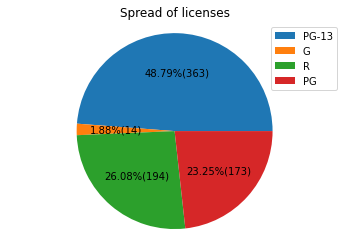

In [160]:
print('*****Opgave 2*****')

licensechart = pd.DataFrame(movieData[['License']])

itemcount = licensechart['License'].value_counts()
pieData={
    "PG-13":itemcount.get('PG-13'),
    "G":itemcount.get('G'),
    "R":itemcount.get('R'),
    "PG":itemcount.get('PG')
}
print(pieData)
labels = []
sizes =[]
for x, y in pieData.items():
    labels.append(x)
    sizes.append(y)
plt.pie(x = sizes,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(pieData.values())))
plt.legend(pieData.keys(),loc= 'upper right')
plt.axis('equal')
plt.title('Spread of licenses')
plt.show()

In [161]:
print('*****Opgave 3*****')
Date=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
Date = '|'.join(Date)   
totalLicense = pd.DataFrame(movieData[['Release Date','License']])
totalLicense['Release Date'] = totalLicense['Release Date'].str.split(',').str[1]
totalLicense = totalLicense[totalLicense['License'].isin(['PG-13','G','PG','R'])]
totalLicense = totalLicense[totalLicense['Release Date'].str.contains(Date)].sort_values('Release Date', ascending = True)

PG13Count = totalLicense[totalLicense['License'].isin(['PG-13'])]


PG13Count = PG13Count['Release Date'].value_counts()
totalLicenseCount = totalLicense['Release Date'].value_counts()

pgDict = PG13Count.to_dict(OrderedDict)
pg13Pct = totalLicenseCount.to_dict()

print('Percentage of PG-13 movies:')
for (k1,v1), (k2,v2) in zip(pg13Pct.items(), pgDict.items()):
    if pg13Pct.keys() == pgDict.keys():
        pg13Pct[k1] = round(((v2/v1)*100),2)
        print(k1,': ',pg13Pct[k1], '%')




*****Opgave 3*****
Percentage of PG-13 movies:
 2014 :  53.66 %
 2013 :  47.5 %
 2010 :  50.0 %
 2012 :  47.22 %
 2009 :  47.22 %
 2015 :  45.71 %
 2011 :  47.06 %
 2008 :  48.48 %
 2007 :  55.56 %
 2005 :  59.09 %
 2006 :  54.55 %
